# Prosper Loan Data Exploration

This project about information on peer to peer loans facilitated by America’s first marketplace lending platform. There are 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan  status,etc.
I will summarize the characteristics of variables affect the loan and the relationships between multiple variables using summary statistics and different data visualizations.

# Project overview


-Univariate Plots Explorations Section
<br>
-Bivariate Plots Explorations Section
<br>
-Multivariate Plots Explorations Section
<br>
-Summary

# Preliminary Wrangling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
from scipy.stats import zscore
import scipy.stats
from matplotlib import dates as mdates
import datetime
from datetime import datetime as dt


dataset loading and info,describe about its properties.

In [3]:
data = pd.read_csv('prosperLoanData.csv')

In [4]:
data.shape

(113937, 81)

In [5]:
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
sum(data.duplicated())

0

<h1>Univariate Plots Explorations Section</h1>

[BorrowerAPR , BorrowerRate , MonthlyLoanPayment , StatedMonthlyIncome , ListingCategory , ProsperScore , ProsperRating ]

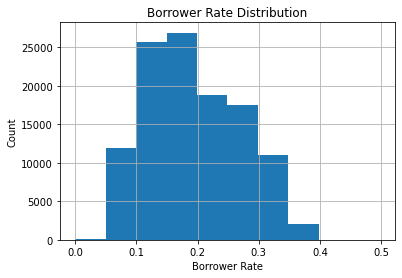

In [9]:
data.BorrowerRate.hist(bins = 10)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.title('Borrower Rate Distribution');

The Borrower's annual interest rate cost of a loan (in %). and its not included any fees. 

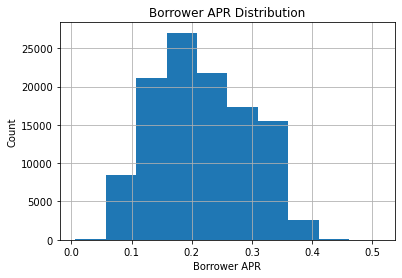

In [10]:
data.BorrowerAPR.hist(bins = 10)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Borrower APR Distribution');

The Borrower's annual cost of a loan with including other fees such as (mortgage  insurance, most closing costs, discount points ,etc.) to reflect the total cost of the loan.

In [11]:
data['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

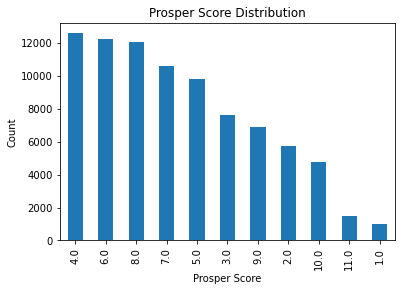

In [12]:
data.ProsperScore.value_counts().plot(kind = 'bar');
plt.xlabel('Prosper Score')
plt.ylabel('Count')
plt.title("Prosper Score Distribution");

A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
From the plot we can say the most frequent score is 4.0 and 11.0 isn't that frequent.

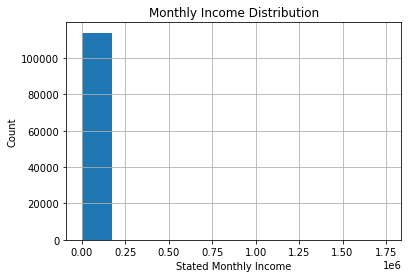

In [13]:
data.StatedMonthlyIncome.hist(bins = 10)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count')
plt.title('Monthly Income Distribution');

In [14]:
data[['StatedMonthlyIncome']].describe()

,StatedMonthlyIncome
count,1.139370e+05
mean,5.608026e+03
std,7.478497e+03
min,0.000000e+00
25%,3.200333e+03
50%,4.666667e+03
75%,6.825000e+03
max,1.750003e+06


In [15]:
scipy.stats.zscore(data['StatedMonthlyIncome'])

array([-0.337595  ,  0.06912842, -0.47131229, ..., -0.36545277,
       -0.23173548, -0.13701907])

In [16]:
outlier= 6.825000e+03 + 1.5*(6.825000e+03-3.200333e+03)

In [17]:
outlier

12262.0005

In [18]:
1.750003e+06 >12262.0005

True

In [19]:
outliers= 3.200333e+03 - 1.5*(6.825000e+03-3.200333e+03)
outliers

-2236.6675

In [20]:
0.000000e+00>-2236.6675

True

In [21]:
data.drop(data.index[data['StatedMonthlyIncome'] >= 12262.0005], inplace = True)

In [22]:
data.drop(data.index[data['StatedMonthlyIncome'] <= -2236.6675], inplace = True)

In [23]:
data[['StatedMonthlyIncome']].describe()

,StatedMonthlyIncome
count,108261.000000
mean,4924.027157
std,2489.431864
min,0.000000
25%,3125.000000
50%,4555.416667
75%,6416.666667
max,12260.166667


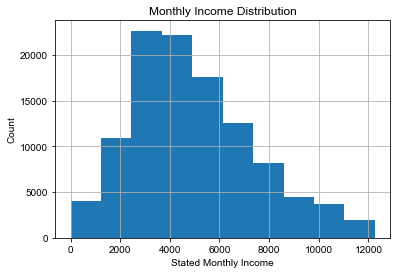

In [24]:
data.StatedMonthlyIncome.hist(bins = 10)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Count')
plt.title('Monthly Income Distribution');
sb.set_style("dark");

The histogram plot of the original data is highly right skewed,so i found the  outliers and remove it that drive data to the left,So in the next plot i have got a more reasonable  plot.

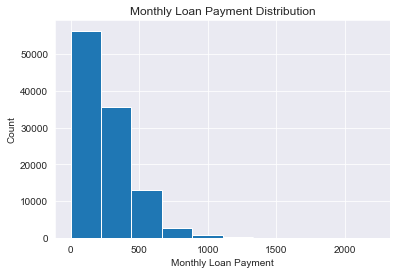

In [25]:
data.MonthlyLoanPayment.hist(bins = 10)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count')
plt.title('Monthly Loan Payment Distribution');
sb.set_style("dark")

In [26]:
data.rename(columns={'ListingCategory (numeric)':'ListingCategory'}, inplace=True)

Is the monthly payment made by the borrower.From the histogram I found that most of Prosper loan are less than  1,000$ .

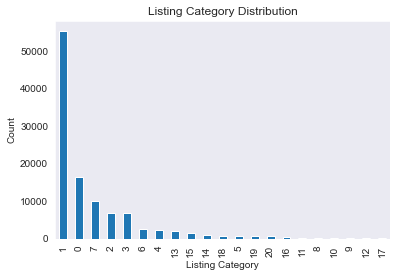

In [27]:
data.ListingCategory.value_counts().plot(kind = 'bar');
plt.xlabel('Listing Category')
plt.ylabel('Count')
plt.title("Listing Category Distribution");
sb.set_style("dark")

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

From the barplot, I found that the most popular service offered by Prosper is Debt Consolidation.

# Univariate Analysis 

First variables I got interested in is the borrower interest rate and APR of the loan. So I plot this two variables first and i found their ranges lie between  0.1-0.4 as APR is normally add some extra fees, so it is  very clear in graph that its a little bit higher than the  normal interest rate.I will do more investigation with time and other variables in next two sections.

Secondly,I also plot prosper Score its distribution high counts in the 4 ,6 and 8 values then come down with all numbers.Three more plots investigation category,month income and month loan payment. Month income distribution is more right skewed, with most of income less than 12k in 10 bins plot. Month loan payment also has a very right skewed distribution more than month income with most loan payment of less than 1k.Category plot show interest result of most popular service offered as Debt Consolidation with a very clear difference.

# Bivariate Plots Exploration Sections

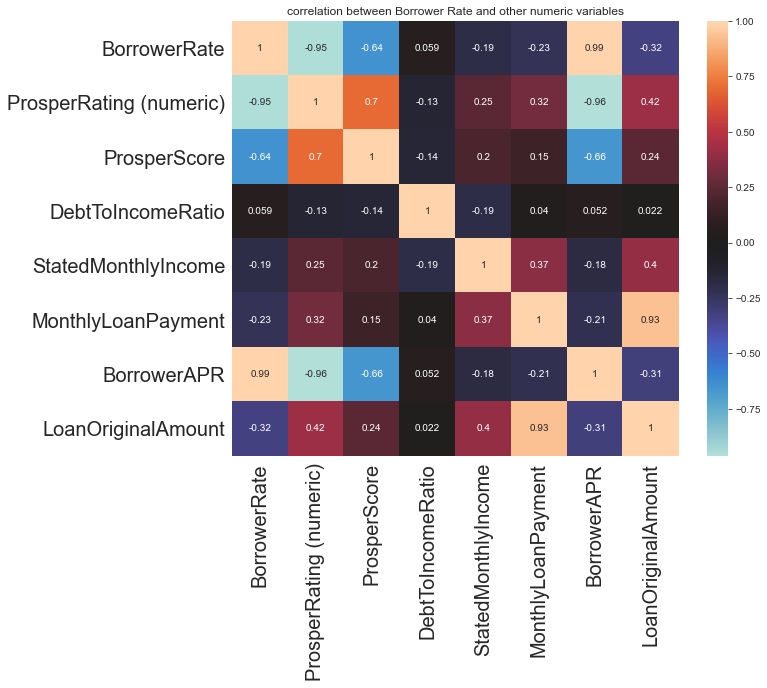

In [28]:
corrolation_df = data[['BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 'BorrowerAPR','LoanOriginalAmount','IncomeRange'  ]]
# correlation plot of numeic variables
plt.figure(figsize = [10, 8])
ax = sb.heatmap(corrolation_df.corr(), annot = True, center = 0)
ax.tick_params(axis='y',labelsize=20) 
ax.tick_params(axis='x',labelsize=20)
ax.set_yticklabels(ax.get_yticklabels(), rotation=360)
plt.title('correlation between Borrower Rate and other numeric variables')
plt.show()

<h5>Heatmap for indicate the correlation between columns indicates :</h5>
1-A strong relation between (BorrowerRate-BorrowerAPR)(BorrowerRate-ProsperRating)(BorrowerRate-prosperScore)(BorrowerAPR-ProsperRating)(ProsperRating-prosperScore)(LoanOriginalAmount-MonthlyLoanPayment).
<br>
2- A modrate relation between (StatedMonthlyIncome-LoanOriginalAmount) (BorrowerAPR-DebtToIncome)(ProsperRating-loanoriginalamount).
lets make farther investigation .

In [29]:
data['year'] = data.ListingCreationDate.str.split('-').str[0]
data.year

0         2007
1         2014
2         2007
3         2012
4         2013
          ... 
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: year, Length: 108261, dtype: object

In [30]:
data.year.max()

'2014'

In [31]:
data.year.min()

'2005'

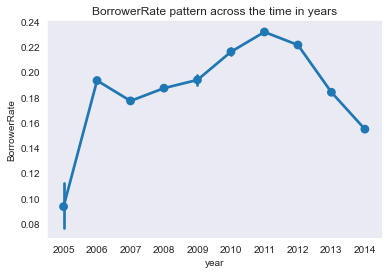

In [32]:
years = np.sort(data.year.unique())
sb.pointplot(data=data, x='year', y='BorrowerRate', order = years);
plt.title('BorrowerRate pattern across the time in years');
sb.set_style("dark")

AS we can see here the BorrowRate increase slowly till 2006 and then decreased between 2006-2007 and then increased again in  2007-2011 and 2011 is the peak point and then started to decrease till 2014.

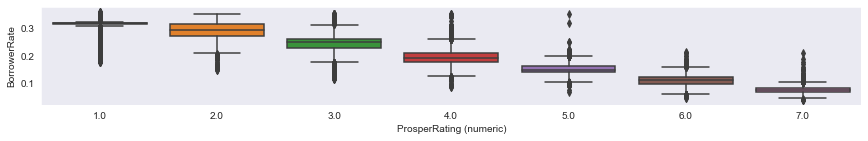

In [42]:
# Look at relationship between ProsperRating and  BorrowerRate,LoanStatus and EmploymentStatus

plt.figure(figsize=[14.70, 8.27])

ax=plt.subplot(4,1,1)
sb.boxplot(data=data, x='ProsperRating (numeric)', y='BorrowerRate');

-Borrower rate plot with prosper rating show strong correlation between them.borrower rate decrease as we go from (1)HR- to (7)AA.
<br>

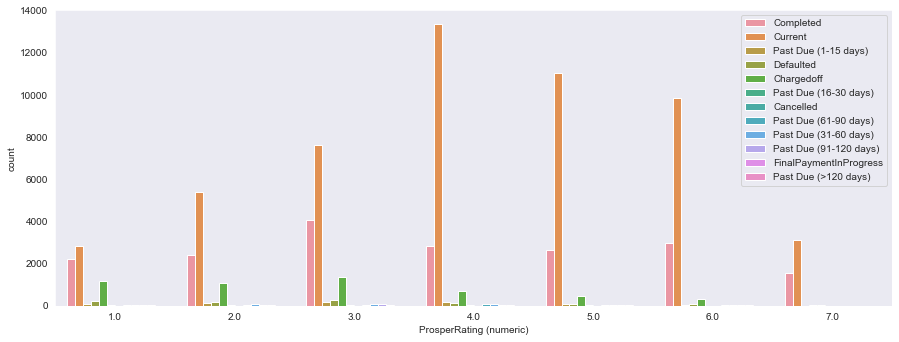

In [34]:
plt.figure(figsize=[15,25])
ax=plt.subplot(4,1,2)
sb.countplot(data=data, x='ProsperRating (numeric)', hue='LoanStatus');
ax.legend(loc='upper right');


-As shown on the plot of LoanStatus and ProsperRating only a few borrowers have loans with Prosper Rating of (7)AA. The proportion is very clear as it very lower than the rest. For example,the HR group loans is more than half of the completed loans.
<br>

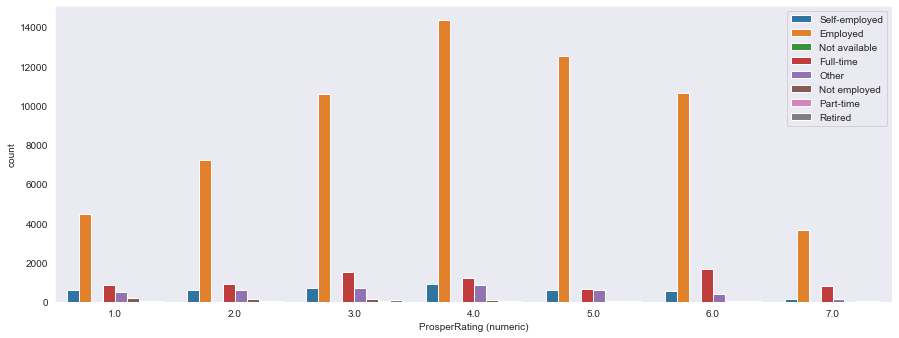

In [35]:
plt.figure(figsize=[15,25])
ax = plt.subplot(4,1,3)
sb.countplot(data=data, x='ProsperRating (numeric)', hue='EmploymentStatus');
ax.legend();


-The graph  of Employment status and ProsperRating shows a very high difference between employees then the full time jobs.


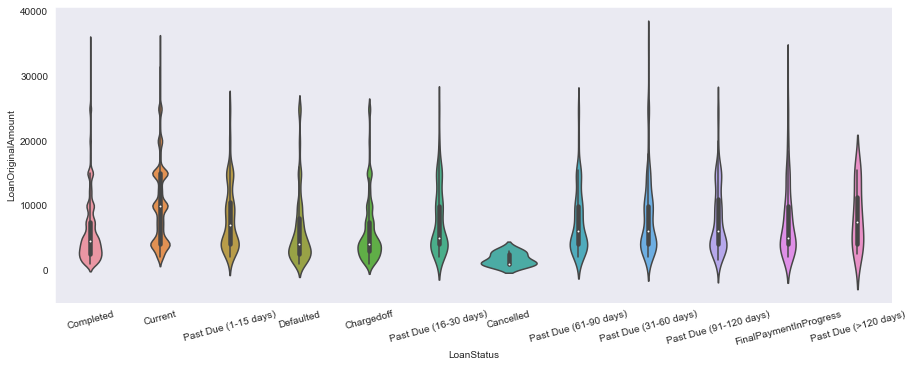

In [36]:
# Look at relationship between LoanStatus and LoanOriginalAmount,StatedMonthlyIncome and EmploymentStatus

plt.figure(figsize=[15,25]) 

plt.subplot(4,1,1)
sb.violinplot(data=data, x='LoanStatus', y='LoanOriginalAmount');
plt.xticks(rotation=15);


-Loan status with loan original amount the plot show a very compact with 0 value for cancel the most of completed one with average loan less than 10000 mean the completed loan is a low value amount most of time and the current loans differ slightly between less than 10000 and with average 10000 and with average between 10 and 20 thousands.<BR> 

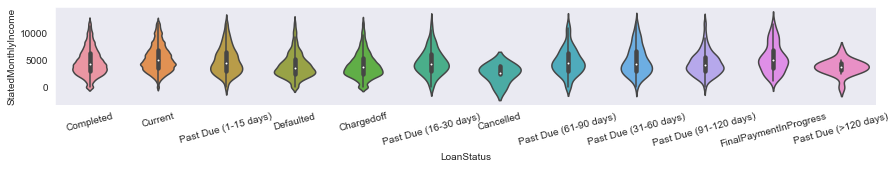

In [43]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(4,1,2)
sb.violinplot(data=data, x='LoanStatus', y='StatedMonthlyIncome');
plt.xticks(rotation=15);


-Loan status with stated monthly income the most lower one is the cancelled with average income near 2500 ,most completed loans little less 5000 income ,current loans near 5000 income, default and chargedoff all most the same.

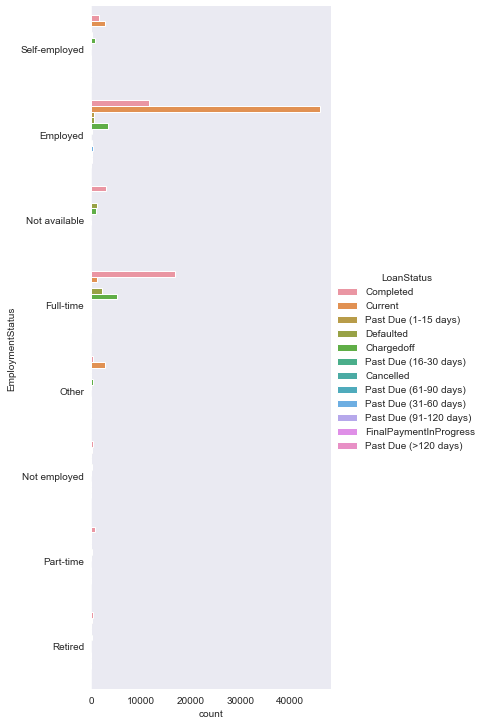

In [44]:
sb.catplot(data=data, y='EmploymentStatus', hue='LoanStatus', kind='count', aspect=6/12 ,height= 10);

As shown the current loan status is most frequent when employment status is employed, and completed loan status is most frequent when employment status is full-time.

# Bivariate Analysis 

1-The correlation we observe in the heatmap :
  -A strong relation between (BorrowerRate-BorrowerAPR)(BorrowerRate-ProsperRating)(BorrowerRate-prosperScore)   (BorrowerAPR-      ProsperRating)(ProsperRating-prosperScore)(LoanOriginalAmount-MonthlyLoanPayment).
  -A modrate relation between (StatedMonthlyIncome-LoanOriginalAmount) (BorrowerAPR-DebtToIncome)(ProsperRating-loanoriginalamount).
  <br>
  <br>
2-The BorrowRate increase slowly till 2006 and then decreased between 2006-2007 and then increased again in 2007-2011 and 2011 is the peak point and then started to decrease till 2014.
<BR>
<br>
3-Prosper rating with the borrower rate plot show strong correlation between them. The borrower rate decrease as we go from (1)HR- to (7)AA.
   <br>
   <br>
4-LoanStatus and ProsperRating As previously shown on the plot. only a few borrowers have loans with Prosper Rating of (7)AA. The proportion is very clear as it very lower than the rest. For example,the HR group loans is more than half of the completed loans.
    <br>
   


5-Employment status and ProsperRating .the graph show a very high difference between employees then the full time jobs.
  <br>
  <br>
6- Loan status with loan original amount the plot show a very compact with 0 value for cancel the most of completed one with average loan less than 10000 mean the completed loan is a low value amount most of time and the current loans differ slightly between less than 10000 and with average 10000 and with average between 10 and 20 thousands.
  <BR>
  <br>
7-Loan status with stated monthly income the most lower one is the cancelled with average income near 2500 ,most completed loans little less 5000 income ,current loans near 5000 income, default and chargedoff all most the same. 
  <br>
  <br>
8-I further investigate employment status with loan status and i saw the current loan status is most frequent when employment status is employed, and completed loan status is most frequent when employment status is full-time.   

# Multivariate Plots Exploration Sections

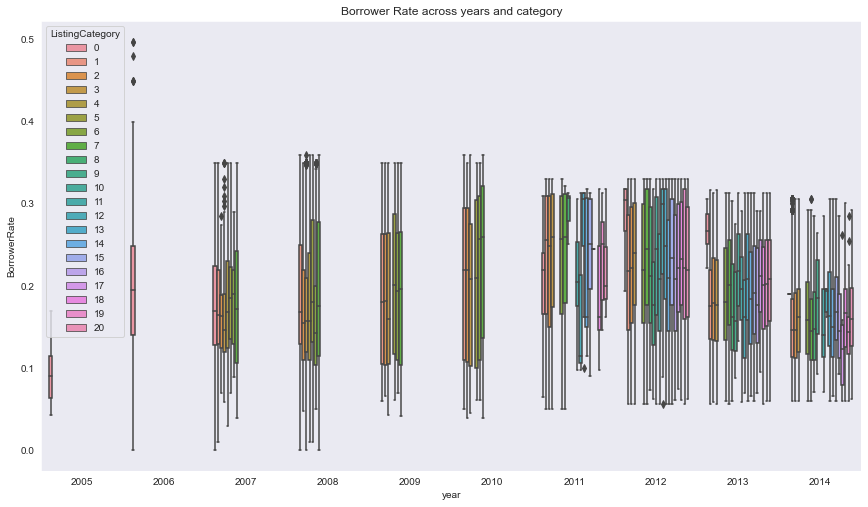

In [45]:
plt.figure(figsize=[14.70, 8.27])
ax = sb.boxplot(data = data, x= 'year', y= 'BorrowerRate', hue= 'ListingCategory', order=years);
plt.title('Borrower Rate across years and category')
plt.ylabel('BorrowerRate');


-The lines for each catagory are similar with the mean plot except one huge jump 2005 and 2006 years for category zero. But when look back to the first time plot,I found a local peak between 2005 and 2006 but with few data point within that time period. Thus the outlier shown is the plot may be the reason for driven the line up.<br>
-The category starts increase in year 2011 and inreased the most between 2011 and 2012 and that describe why the first Borrower rate-Year increase between that 2 points signifcantly.<br>
-The first 10 categoris is distrbuted clearly across all the plot and the last 10 one start to become in the whole image since 2011.

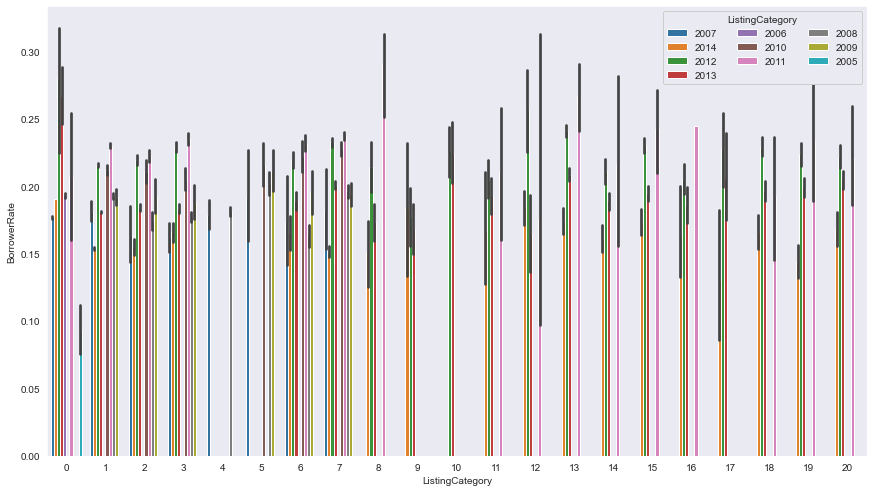

In [46]:
plt.figure(figsize=[14.70, 8.27]) 
ax = sb.barplot(data = data, x = 'ListingCategory', y = 'BorrowerRate', hue = 'year')
ax.legend(loc = 'upper right', ncol = 3, framealpha = 1, title = 'ListingCategory');

As shown in listing catagory with years and borrower rate indicate that 2011 the most grown year for all categories expect for 0,4,5,9 and 10, Category 0 most grown at 2012 and 2014.
Category 4 most grown at 2007 and 2009.
Category 5 most grown at 2007 and 2010.
Category 9 most grown at 2014.
Category 10 most grown at 2012 and 2013.

<Figure size 1058.4x595.44 with 0 Axes>

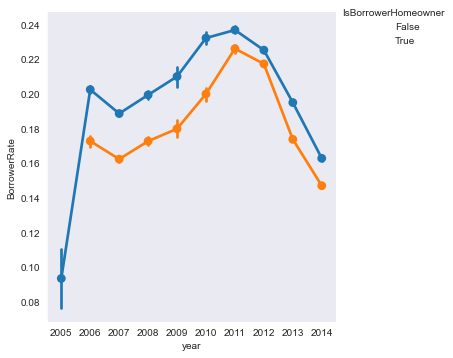

In [47]:
fig = plt.figure(figsize=[14.70, 8.27])
g = sb.FacetGrid(data = data, hue = 'IsBorrowerHomeowner', height = 5)
g.map(sb.pointplot, 'year', 'BorrowerRate',order=years)
g.add_legend(loc='upper right');


we can see that Borrower rate increased when a person is non home owner.

# Multivariate Analysis 

(1)-In the bivariate analysis I didn’t  feel that i get useful information about the Borrower rate and how it changes with time. So I included another variable (listing catagory) here to see if i can find any interesting thing with 2 different plots for individual listings.<br>
-The lines for each catagory are similar with the mean plot except one huge jump 2005 and 2006 years for category zero. But when look back to the first time plot,I found a local peak between 2005 and 2006 but with few data point within that time period.  Thus the outlier shown is the plot may be the reason for driven the line up.<br>
-The category starts increase in year 2011 and inreased the most between 2011 and 2012 and that describe why the first Borrower rate-Year increase between that 2 points signifcantly.<br>
-The first 10 categoris is distrbuted clearly across all the plot and the last 10 one start to become in the whole image since 2011.<br>
-The second plot for listing catagory with years and borrower rate indicate that 2011 the most grown year for all categories expect for 0,4,5,9 and 10,
Category 0 most grown at 2012 and 2014.<br>
Category 4 most grown at 2007 and 2009.<br>
Category 5 most grown at 2007 and 2010.<br>
Category 9 most grown at 2014.<br>
Category 10 most grown at 2012 and 2013.<br>





<br>
(2)- It's Significantly clear that the Borrower rate increased when a person is non homeowner.the interest rate for homeowners  are generally lower than non-homeowners. Homeowners usually have lower risk loans  its a very popular reason since bank can use their house as collateral if they didnt pay on time.

# Summary

1-Firstly I got interested in is the borrower interest rate and APR of the loan. So I plot this two variables first and i found their ranges lie between 0.1-0.4 as APR is normally add some extra fees, so it is very clear in graph that its a little bit higher than the normal interest rate.I will do more investigation with time and other variables in next two sections.
<br>
2-Secondly,I also plot prosper Score its distribution high counts in the 4 ,6 and 8 values then come down with all numbers.Three more plots investigation category,month income and month loan payment. Month income distribution is more right skewed, with most of income less than 12k in 10 bins plot. Month loan payment also has a very right skewed distribution more than month income with most loan payment of less than 1k.Category plot show interest result of most popular service offered as Debt Consolidation with a very clear difference.
<br>

3-The correlation we observe in the heatmap : -A strong relation between (BorrowerRate-BorrowerAPR,ProsperRating,prosperScore)( ProsperRating-BorrowerAPR,prosperScore)(LoanOriginalAmount-MonthlyLoanPayment). -A modrate relation between(StatedMonthlyIncome-LoanOriginalAmount) (BorrowerAPR-DebtToIncome)(ProsperRating-loanoriginalamount).
<br>
4-The BorrowRate increase slowly till 2006 and then decreased between 2006-2007 and then increased again in 2007-2011 and 2011 is the peak point and then started to decrease till 2014.
<br>

5-Prosper rating with the borrower rate plot show strong correlation between them. The borrower rate decrease as we go from (1)HR- to (7)AA.
<br>
6-LoanStatus and ProsperRating As previously shown on the plot. only a few borrowers have loans with Prosper Rating of (7)AA. The proportion is very clear as it very lower than the rest. For example,the HR group loans is more than half of the completed loans.
<br>
7-Employment status and ProsperRating .the graph show a very high difference between employees then the full time jobs.
<br>

8- Loan status with loan original amount the plot show a very compact with 0 value for cancel the most of completed one with average loan less than 10000 mean the completed loan is a low value amount most of time and the current loans differ slightly between less than 10000 and with average 10000 and with average between 10 and 20 thousands.
<br>
9-Loan status with stated monthly income the most lower one is the cancelled with average income near 2500 ,most completed loans little less 5000 income ,current loans near 5000 income, default and chargedoff all most the same.
<br>
10-I further investigate employment status with loan status and i saw the current loan status is most frequent when employment status is employed, and completed loan status is most frequent when employment status is full-time.


11-listing catagory with Borrowerrate and year in 2 different plots.The lines for each catagory are similar with the mean plot except one huge jump 2005 and 2006 years for category zero. But when look back to the first time plot,I found a local peak between 2005 and 2006 but with few data point within that time period. Thus the outlier shown is the plot may be the reason for driven the line up.The category starts increase in year 2011 and inreased the most between 2011 and 2012 and that describe why the firstBorrower rate-Year increase between that 2 points signifcantly.The first 10 categoris is distrbuted clearly across all the plot and the last 10 one start to become in the whole image since 2011.The second plot for listing catagory with years and borrower rate indicate that 2011 the most grown year for all categories expect for 0,4,5,9 and 10, Category 0 most grown at 2012 and 2014.Category 4 most grown at 2007 and 2009.Category 5 most grown at 2007 and 2010.Category 9 most grown at 2014. Category 10 most grown at 2012 and 2013.


<br>
12- It's Significantly clear that the Borrower rate increased when a person is non homeowner.the interest rate for homeowners are generally lower than non-homeowners. Homeowners usually have lower risk loans its a very popular reason since bank can use their house as collateral if they didnt pay on time.